In [144]:
# !pip install scikit-learn !pip install seaborn !pip install scipy !pip install statsmodels

In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('../data/oscar_age_cleaned.csv')


In [12]:
# records d'obtention d'oscars par genre
oscars_by_gender = df['gender'].value_counts()

In [149]:
print("Chargement du dataset, Dimensions Lignes, Colonnes:")
df.shape

Chargement du dataset, Dimensions Lignes, Colonnes:


(199, 6)

In [152]:
# âge moyen d'obtention de l'Oscar par genre
print("âge moyen d'obtention de l'Oscar par genre")
mean_age_by_gender

âge moyen d'obtention de l'Oscar par genre


gender
F    37.990291
M    44.552083
Name: age, dtype: float64

In [17]:
# évolution de l'age moyen par décennie et par genre, avec histogramme et régression linéaire

In [112]:
mean_age_by_decade_gender

,decade,gender,age
0,1920,F,29.000000
1,1920,M,49.000000
2,1930,F,31.900000
3,1930,M,40.200000
4,1940,F,31.500000
5,1940,M,42.800000
6,1950,F,36.700000
7,1950,M,41.000000
8,1960,F,36.000000
9,1960,M,45.500000


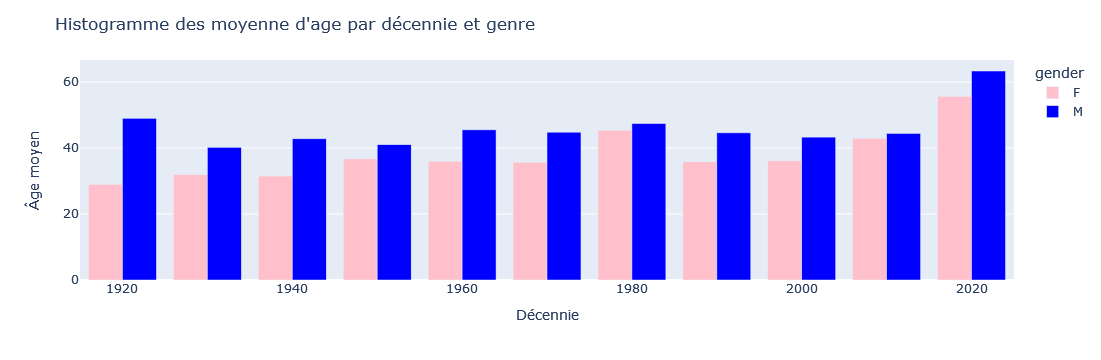

In [154]:
import pandas as pd
import plotly.express as px
import numpy as np


# 1. Créer une nouvelle colonne pour représenter la décennie
df['decade'] = (df['year'] // 10) * 10

# 2. Calculer l'âge moyen par décennie et par genre
mean_age_by_decade_gender = df.groupby(['decade', 'gender'])['age'].mean().reset_index()

# 3. Tracer un graphique en barres pour chaque décennie et chaque genre avec Plotly Express
fig = px.bar(mean_age_by_decade_gender, x='decade', y='age', color='gender',
             barmode='group', color_discrete_map={'M': 'blue', 'F': 'pink'})


# Ajouter des étiquettes
fig.update_layout(title="Histogramme des age moyens par genre et decenies",
                  xaxis_title="Décennie", yaxis_title="Âge moyen")

# Afficher le graphique interactif
fig.show()


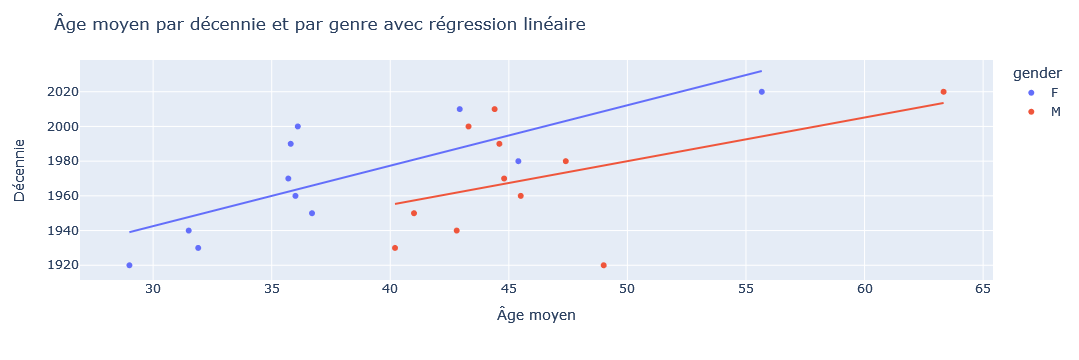

In [121]:
# 

import pandas as pd
import plotly.express as px

# 1. Créer une nouvelle colonne pour représenter la décennie
df['decade'] = (df['year'] // 10) * 10

# 2. Calculer l'âge moyen par décennie et par genre
mean_age_by_decade_gender = df.groupby(['decade', 'gender'])['age'].mean().reset_index()

# 3. Tracer un scatter plot pour chaque décennie et chaque genre avec Plotly Express
#    "ols" : Cette valeur spécifie une ligne de tendance basée sur la méthode des moindres carrés ordinaires (OLS)
#    "lowess" : Cette valeur spécifie une ligne de tendance basée sur la méthode LOESS (Locally Weighted Scatterplot Smoothing)
#    "exp" : Cette valeur spécifie une ligne de tendance exponentielle qui modélise la relation exponentielle entre les variables.
#    "poly" : Cette valeur spécifie une ligne de tendance polynomiale qui modélise la relation entre les variables avec un polynôme de degré spécifié.
#    "moving_avg" : Cette valeur spécifie une ligne de tendance basée sur la moyenne mobile.

fig = px.scatter(mean_age_by_decade_gender, x='age', y='decade', color='gender',
                 trendline="ols")

# Ajouter des étiquettes
fig.update_layout(title="Âge moyen par décennie et par genre avec régression linéaire",
                  xaxis_title="Âge moyen", yaxis_title="Décennie")

# Afficher le graphique interactif
fig.show()

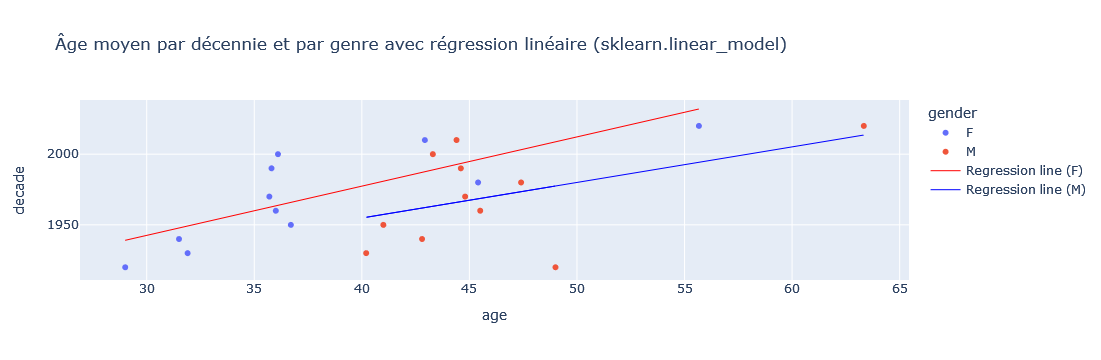

In [155]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression

# Supposons que df est votre DataFrame avec les colonnes 'year', 'age' et 'gender'

# 1. Créer une nouvelle colonne pour représenter la décennie
df['decade'] = (df['year'] // 10) * 10

# 2. Calculer l'âge moyen par décennie et par genre
mean_age_by_decade_gender = df.groupby(['decade', 'gender'])['age'].mean().reset_index()

# 3. Créer le modèle de régression linéaire
model = LinearRegression()

# Définir les couleurs pour chaque genre
color_map = {'M': 'blue', 'F': 'red'}

# 4. Pour chaque genre, ajustez le modèle et prédisez les valeurs
fig = px.scatter(mean_age_by_decade_gender, x='age', y='decade', color='gender',
                 title="Âge moyen par décennie et par genre avec régression linéaire (sklearn.linear_model)")

for gender in mean_age_by_decade_gender['gender'].unique():
    data = mean_age_by_decade_gender[mean_age_by_decade_gender['gender'] == gender]
    X = data['age'].values.reshape(-1, 1)  # Features (âge moyen)
    y = data['decade']  # Target (décennie)
    model.fit(X, y)  # Ajuster le modèle
    # Prédire les valeurs
    data = data.copy()  # Créer une copie indépendante du DataFrame
    data['predicted_decade'] = model.predict(X)
    # Ajouter les valeurs prédites au graphique en tant que ligne avec la couleur spécifique au genre
    fig.add_scatter(x=data['age'], y=data['predicted_decade'], mode='lines',
                    name=f'Regression line ({gender})', line=dict(color=color_map[gender], width=1))

# Afficher le graphique interactif
fig.show()


In [158]:
df

,year,age,name,movie,gender,decade
0,1927,44,Emil Jannings,"The Last Command, The Way of All Flesh",M,1920
1,1927,22,Janet Gaynor,"Seventh Heaven, Street Angel and Sunrise: A So...",F,1920
2,1928,41,Warner Baxter,In Old Arizona,M,1920
3,1928,37,Mary Pickford,Coquette,F,1920
4,1929,62,George Arliss,Disraeli,M,1920
...,...,...,...,...,...,...
194,2021,53,Will Smith,King Richard,M,2020
195,2021,44,Jessica Chastain,The Eyes of Tammy Faye,F,2020
196,2022,54,Brendan Fraser,The Whale,M,2020
197,2022,60,Michelle Yeoh,Everything Everywhere All at Once,F,2020


In [168]:
import pandas as pd

# Supposons que df est votre DataFrame avec la colonne 'gender'
# df.head()  # Pour afficher les premières lignes du DataFrame

# Ajouter une nouvelle colonne 'gender_code' avec les valeurs 0 pour 'M' et 1 pour 'F'
df['gender_code'] = df['gender'].apply(lambda x: 0 if x == 'M' else 1)

# Calculer le coefficient de corrélation de Pearson entre l'âge et le genre codé
correlation = df['age'].corr(df['gender_code'])
print(" Direction de la corelation entre l'âge et le genre codé :", correlation)


 Direction de la corelation entre l'âge et le genre codé : -0.28039389954396476


In [169]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         199 non-null    int64 
 1   age          199 non-null    int64 
 2   name         199 non-null    object
 3   movie        199 non-null    object
 4   gender       199 non-null    object
 5   decade       199 non-null    int64 
 6   gender_code  199 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.0+ KB


In [204]:
# Le test du chi carré est utilisé pour déterminer si les différences entre les données observées et les données attendues
# sont statistiquement significatives.
#La statistique du test mesure cette différence, la valeur de p indique la probabilité d'observer une telle différence sous l'hypothèse nulle, 
# et les degrés de liberté représentent le nombre de valeurs indépendantes dans le calcul.
#Le tableau des fréquences attendues montre les valeurs que l'on s'attendrait à observer si l'hypothèse nulle était vraie.


import pandas as pd
from scipy.stats import chi2_contingency


# oscar_count est le DataFrame contenant le nombre d'Oscars par personne et par genre
oscar_count = df.groupby(['name', 'gender'])['movie'].size().reset_index(name='oscar_count')

# Tableau de contingence : nombre d'Oscars par genre
contingency_table = pd.crosstab(index=oscar_count['gender'], columns=oscar_count['oscar_count'])

# Effectuer le test du chi carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print("Test du Chi carré :")
print(f"   - Statistique du test : {chi2}")
print(f"   - Valeur de p : {p}")
print(f"   - Degrés de liberté : {dof}")
print("Tableau des fréquences attendues :")
print(expected)
if p > .05:
    print ("¨Pas de differrence significative d'attribution d'oscars entre homme et femme") 
else: 
    print("L'attribution des Oscars est problematique vis a vis des genres,...")

Test du Chi carré :
   - Statistique du test : 6.9179525364186585
   - Valeur de p : 0.14028810686244964
   - Degrés de liberté : 4
Tableau des fréquences attendues :
[[65.0304878  12.52439024  0.48170732  0.48170732  0.48170732]
 [69.9695122  13.47560976  0.51829268  0.51829268  0.51829268]]
¨Pas de differrence significative d'attribution d'oscars entre homme et femme


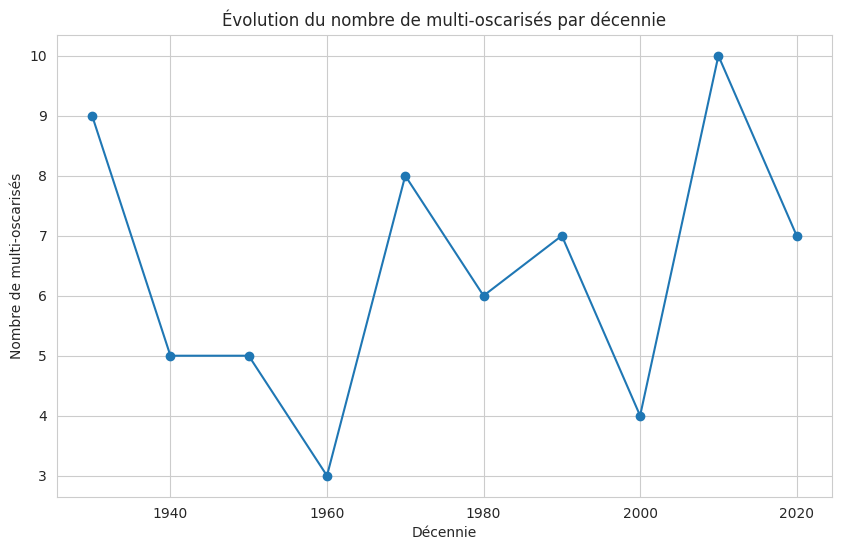

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df est votre DataFrame avec les colonnes 'year', 'age' et 'gender'

# 1. Créer une nouvelle colonne pour représenter la décennie
df['decade'] = (df['year'] // 10) * 10

# 2. Compter le nombre d'oscars remportés par chaque personne
oscar_counts = df.groupby('name')['movie'].count().reset_index()

# 3. Identifier les multi-oscarisés
multi_oscar_winners = oscar_counts[oscar_counts['movie'] > 1]

# 4. Grouper les données par décennie et compter le nombre de multi-oscarisés dans chaque décennie
multi_oscar_by_decade = multi_oscar_winners.merge(df, on='name').groupby('decade')['name'].count().reset_index()

# 5. Tracer un graphique pour visualiser l'évolution du nombre de multi-oscarisés par décennie
plt.figure(figsize=(10, 6))
plt.plot(multi_oscar_by_decade['decade'], multi_oscar_by_decade['name'], marker='o', linestyle='-')
plt.title("Évolution du nombre de multi-oscarisés par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre de multi-oscarisés")
plt.grid(True)
plt.show()


In [ ]:
#Bonus
people = pd.read_csv('./data/oscar_age_cleaned.csv')

In [ ]:
oscar = pd.read_csv('./data/oscar_all_nominations.csv')

In [ ]:
merged_df = pd.merge(people,oscar, left_on='name', right_on='entity', how='inner')